In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["PYTHONWARNINGS"] = "ignore"

In [3]:
cur_folder_name = os.getcwd().split('/')[-1]
if cur_folder_name != "fairness-variance":
    os.chdir("../../../../..")

print('Current location: ', os.getcwd())

Current location:  /home/denys_herasymuk/Research/NYU/Code/fairness-variance


# Visualizations

In [4]:
from virny.utils.custom_initializers import create_models_metrics_dct_from_database_df

from source.utils.db_functions import read_model_metric_dfs_from_db
from source.custom_classes.experiments_composer import ExperimentsComposer
from source.visualizations import preprocess_metrics, create_group_base_and_fair_models_box_plot

pip install 'aif360[LawSchoolGPA]'
2024-01-08 15:05:46.828758: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-08 15:05:46.866384: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-08 15:05:46.866928: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-08 15:05:47.662060: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## Initialize Configs

In [5]:
DB_COLLECTION_NAME = 'one_repair_lvl_many_models'
EXPERIMENT_SESSION_UUID = '84eeb5f0-4ebe-4d9f-94ef-53ae302c2264'
SENSITIVE_ATTRS = ['SEX', 'RAC1P', 'SEX&RAC1P']
SENSITIVE_ATTR_FOR_INTERVENTION = 'SEX&RAC1P'
MODEL_NAMES = ['AdversarialDebiasing']

In [6]:
from source.utils.db_functions import connect_to_mongodb

client, collection_obj, db_writer_func = connect_to_mongodb(DB_COLLECTION_NAME)

## Group Metrics Composition

In [7]:
model_metric_dfs = read_model_metric_dfs_from_db(collection_obj, EXPERIMENT_SESSION_UUID)
models_metrics_dct = create_models_metrics_dct_from_database_df(model_metric_dfs)
client.close()

In [8]:
# Append Test_Set_Index to each result set for models
for model_name in models_metrics_dct.keys():
    models_metrics_dct[model_name]['Test_Set_Index'] = 0

In [9]:
models_metrics_dct[list(models_metrics_dct.keys())[0]].shape

(19, 33)

In [10]:
models_metrics_dct[list(models_metrics_dct.keys())[0]][
    models_metrics_dct[list(models_metrics_dct.keys())[0]]['Experiment_Iteration'] == 'Exp_iter_1'
].head(20)

,Metric,Model_Name,Model_Params,Dataset_Name,Num_Estimators,Tag,Record_Create_Date_Time,Session_Uuid,Experiment_Iteration,Dataset_Split_Seed,...,SEX&RAC1P_priv_correct,SEX&RAC1P_priv_incorrect,SEX_dis,SEX_dis_correct,SEX_dis_incorrect,SEX_priv,SEX_priv_correct,SEX_priv_incorrect,overall,Test_Set_Index
0,Accuracy,AdversarialDebiasing,{'sensitive_attr_for_intervention': 'SEX&RAC1P...,Folktables_GA_2018_Income,20,OK,2024-01-08 12:59:36.126,84eeb5f0-4ebe-4d9f-94ef-53ae302c2264,Exp_iter_1,100,...,1.000000,0.000000,0.826741,1.000000,0.000000,0.794885,1.000000,0.000000,0.810133,0
1,Aleatoric_Uncertainty,AdversarialDebiasing,{'sensitive_attr_for_intervention': 'SEX&RAC1P...,Folktables_GA_2018_Income,20,OK,2024-01-08 12:59:36.126,84eeb5f0-4ebe-4d9f-94ef-53ae302c2264,Exp_iter_1,100,...,0.134535,0.302556,0.140969,0.110862,0.284627,0.170575,0.138215,0.295980,0.156403,0
2,Epistemic_Uncertainty,AdversarialDebiasing,{'sensitive_attr_for_intervention': 'SEX&RAC1P...,Folktables_GA_2018_Income,20,OK,2024-01-08 12:59:36.126,84eeb5f0-4ebe-4d9f-94ef-53ae302c2264,Exp_iter_1,100,...,0.168712,0.345847,0.181434,0.146432,0.348453,0.212700,0.177883,0.347628,0.197734,0
3,F1,AdversarialDebiasing,{'sensitive_attr_for_intervention': 'SEX&RAC1P...,Folktables_GA_2018_Income,20,OK,2024-01-08 12:59:36.126,84eeb5f0-4ebe-4d9f-94ef-53ae302c2264,Exp_iter_1,100,...,1.000000,0.000000,0.679712,1.000000,0.000000,0.746684,1.000000,0.000000,0.721222,0
4,FNR,AdversarialDebiasing,{'sensitive_attr_for_intervention': 'SEX&RAC1P...,Folktables_GA_2018_Income,20,OK,2024-01-08 12:59:36.126,84eeb5f0-4ebe-4d9f-94ef-53ae302c2264,Exp_iter_1,100,...,0.000000,1.000000,0.337349,0.000000,1.000000,0.264010,0.000000,1.000000,0.292083,0
5,FPR,AdversarialDebiasing,{'sensitive_attr_for_intervention': 'SEX&RAC1P...,Folktables_GA_2018_Income,20,OK,2024-01-08 12:59:36.126,84eeb5f0-4ebe-4d9f-94ef-53ae302c2264,Exp_iter_1,100,...,0.000000,1.000000,0.110254,0.000000,1.000000,0.164062,0.000000,1.000000,0.135566,0
6,IQR,AdversarialDebiasing,{'sensitive_attr_for_intervention': 'SEX&RAC1P...,Folktables_GA_2018_Income,20,OK,2024-01-08 12:59:36.126,84eeb5f0-4ebe-4d9f-94ef-53ae302c2264,Exp_iter_1,100,...,0.131078,0.356228,0.158582,0.113892,0.371829,0.178899,0.135781,0.345996,0.169174,0
7,Jitter,AdversarialDebiasing,{'sensitive_attr_for_intervention': 'SEX&RAC1P...,Folktables_GA_2018_Income,20,OK,2024-01-08 12:59:36.126,84eeb5f0-4ebe-4d9f-94ef-53ae302c2264,Exp_iter_1,100,...,0.120390,0.285636,0.132992,0.101610,0.282738,0.159314,0.126922,0.284841,0.146714,0
8,Label_Stability,AdversarialDebiasing,{'sensitive_attr_for_intervention': 'SEX&RAC1P...,Folktables_GA_2018_Income,20,OK,2024-01-08 12:59:36.126,84eeb5f0-4ebe-4d9f-94ef-53ae302c2264,Exp_iter_1,100,...,0.837746,0.588206,0.815766,0.862803,0.591318,0.779693,0.828893,0.589027,0.796960,0
9,Mean_Prediction,AdversarialDebiasing,{'sensitive_attr_for_intervention': 'SEX&RAC1P...,Folktables_GA_2018_Income,20,OK,2024-01-08 12:59:36.126,84eeb5f0-4ebe-4d9f-94ef-53ae302c2264,Exp_iter_1,100,...,0.657056,0.516519,0.721913,0.761774,0.531704,0.597249,0.616317,0.523356,0.656921,0


In [11]:
exp_composer = ExperimentsComposer(models_metrics_dct, SENSITIVE_ATTRS)
exp_subgroup_metrics_dct = exp_composer.create_exp_subgroup_metrics_dct_for_mult_test_sets()

In [12]:
exp_group_metrics_dct = exp_composer.compose_group_metrics_for_mult_test_sets(exp_subgroup_metrics_dct)

## Figure 1. Subgroup boxplots.

In [13]:
melted_all_subgroup_metrics_per_model_dct, melted_all_group_metrics_per_model_dct = \
    preprocess_metrics(exp_subgroup_metrics_dct, exp_group_metrics_dct)

In [14]:
vals_to_replace = {
    'Model_Name': {
        'LGBMClassifier': 'LGBM',
        'LogisticRegression': 'LR',
        'RandomForestClassifier': 'RF',
        'MLPClassifier': 'MLP'
    }
}

<Figure size 1200x600 with 0 Axes>

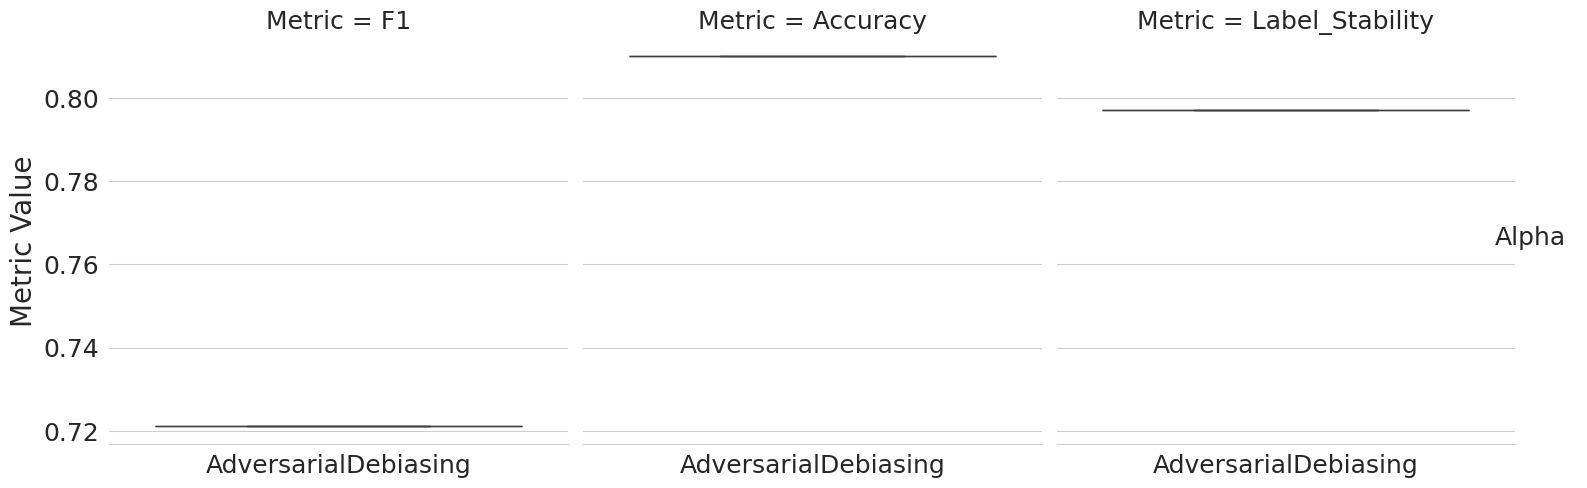

In [15]:
create_group_base_and_fair_models_box_plot(melted_all_subgroup_metrics_per_model_dct,
                                           # ylim=(0.75, 1.0),
                                           metric_names=['F1', 'Accuracy', 'Label_Stability'],
                                           vals_to_replace=vals_to_replace)

## Figure 2. Create group boxplots.

<Figure size 1200x600 with 0 Axes>

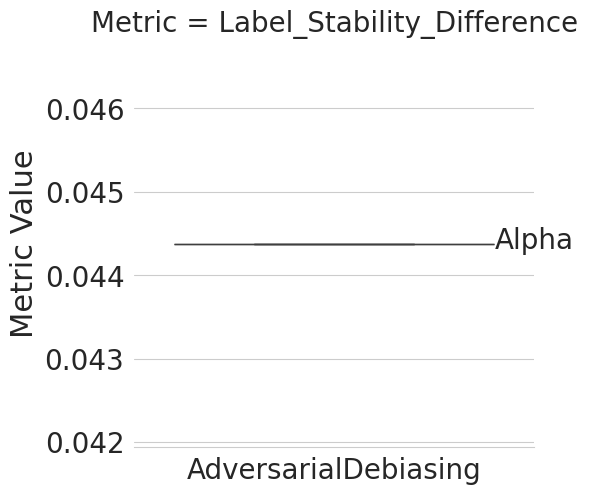

In [16]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct,
                                           group=SENSITIVE_ATTR_FOR_INTERVENTION,
                                           metric_names=['Label_Stability_Difference'],
                                           vals_to_replace=vals_to_replace)

<Figure size 1200x600 with 0 Axes>

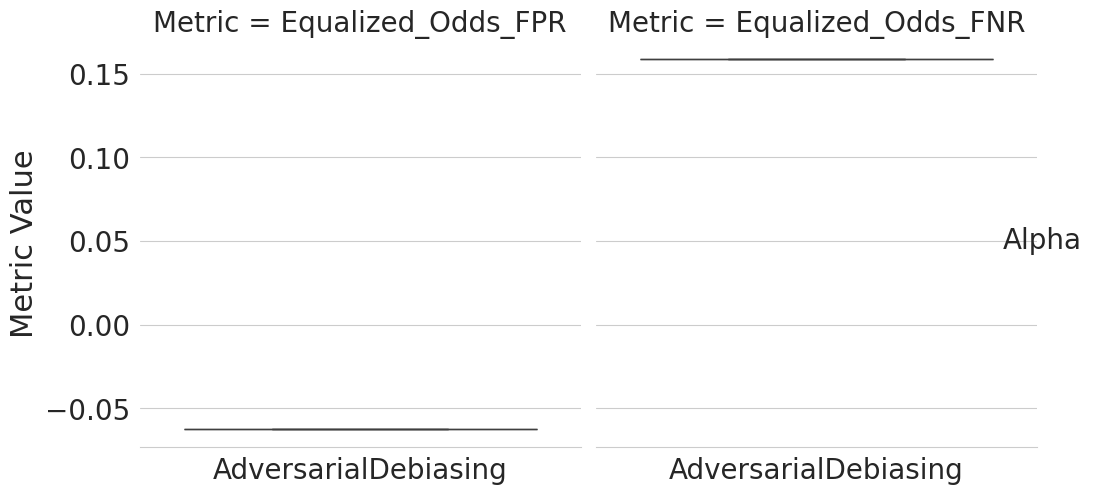

In [17]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct,
                                           group=SENSITIVE_ATTR_FOR_INTERVENTION,
                                           metric_names=['Equalized_Odds_FPR', 'Equalized_Odds_FNR'],
                                           vals_to_replace=vals_to_replace)

<Figure size 1200x600 with 0 Axes>

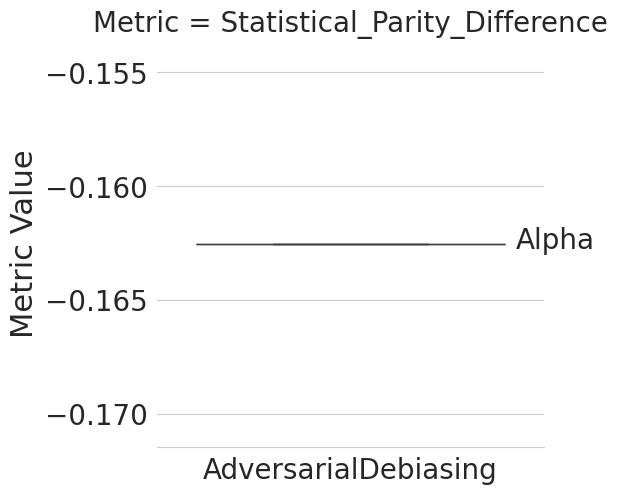

In [18]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct,
                                           group=SENSITIVE_ATTR_FOR_INTERVENTION,
                                           metric_names=['Statistical_Parity_Difference'],
                                           vals_to_replace=vals_to_replace)